<a href="https://colab.research.google.com/github/amitsharhcl/simple-java-maven-app/blob/master/Exercise_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en,en-US;q=0.5' --referer 'https://www.kaggle.com/' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-datasets/8782/44566/flowers.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1554473283&Signature=QBQerSnlvJjIViedrfsVqEdmwukDl%2FTmzrE2HxUOOAo0cx2g5k%2BF2r%2FI1Mdm5z7TX87qA09%2FqbgumJ5wHm515fV8JcNy0pmJEVnkikJrye8QnO%2FNEsPtbxPq5ff5pB7HIFK%2FmnFTyvbm9FaQ%2BSUv76440sohnoJne96OfCnXACzvPyBO8qt5FMYbtnVM3rd3zL%2FXyLJAVfpFtwpXIgpGZDiklaGMkghmKliGuccSgG10V5X7KAqKZmMspZjjiOBpJSSfQt3fK%2FtNbvBLzADyz%2BnPDqf0J1m8fsiYX9CV6yFniUgZdCvR0QdpmZSPgY55T5NkkvMvj9unZ2bzNi7WDQ%3D%3D' --output 'flowers.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  224M  100  224M    0     0  34.1M      0  0:00:06  0:00:06 --:--:-- 45.7M


In [0]:
from fastai.vision import *

In [0]:
!unzip flowers.zip

Archive:  flowers.zip
   creating: flowers/
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/da

In [0]:
!mkdir data/flowers

In [0]:
!mv -f flowers/* data/flowers/

In [0]:
!ls data/flowers/daisy

100080576_f52e8ee070_n.jpg    3456403987_5bd5fa6ece_n.jpg
10140303196_b88d3d6cec.jpg    34566613262_fefbcc279a_n.jpg
10172379554_b296050f82_n.jpg  34571214621_f655295459_n.jpg
10172567486_2748826a8b.jpg    34585331601_837dbe5254_n.jpg
10172636503_21bededa75_n.jpg  34585995071_13e07140d8_n.jpg
102841525_bd6628ae3c.jpg      34590677231_0ed33ccd55_n.jpg
10300722094_28fa978807_n.jpg  34591991761_16fc5c9c00_n.jpg
1031799732_e7f4008c03.jpg     34602180741_cf2f671ba5_n.jpg
10391248763_1d16681106_n.jpg  34611565966_9de274f987_n.jpg
10437754174_22ec990b77_m.jpg  34613530216_26cf037012_n.jpg
10437770546_8bb6f7bdd3_m.jpg  3463313493_9497aa47e5_n.jpg
10437929963_bc13eebe0c.jpg    34637394046_f85541735d_n.jpg
10466290366_cc72e33532.jpg    34637970155_a2b917077c_n.jpg
10466558316_a7198b87e2.jpg    34638378196_216d5bbc2e_n.jpg
10555749515_13a12a026e.jpg    34643914016_2e659d6e82_n.jpg
10555815624_dc211569b0.jpg    34652819496_0b6f758986_n.jpg
10555826524_423eb8bf71_n.jpg  34658035045_7782e95b50_n.jpg

In [0]:
bs = 64

In [0]:
tfms = get_transforms(max_rotate=25); len(tfms)

2

In [0]:
path = Path('data/flowers');path.ls()

[PosixPath('data/flowers/dandelion'),
 PosixPath('data/flowers/daisy'),
 PosixPath('data/flowers/sunflower'),
 PosixPath('data/flowers/rose'),
 PosixPath('data/flowers/tulip')]

In [0]:
classes = ['dandelion','rose','sunflower','daisy','tulip']

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_workers = 8)

dandelion


rose


sunflower


daisy


tulip


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train =".", valid_pct = 0.2,ds_tfms = get_transforms(), size = 224, num_workers= 4).normalize(imagenet_stats)

In [0]:
data.classes


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

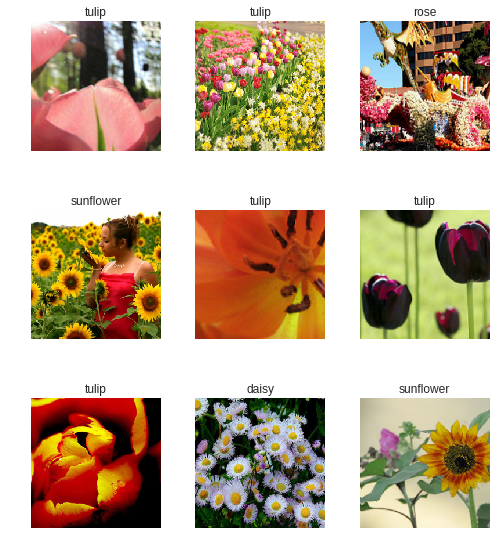

In [0]:
data.show_batch(rows =3, figsize=(7,8) )

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], 5, 3459, 864)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate) 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:02, 34874244.32it/s]


##Other Architectures

In [30]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate) 

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:02, 40981848.25it/s]


In [31]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.616271,0.311481,0.105324,01:15
1,0.407210,0.240729,0.078704,01:09
2,0.284038,0.214828,0.077546,01:09
3,0.203722,0.208265,0.075231,01:09


In [0]:
learn.save('stage1')

In [0]:
learn.unfreeze()

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


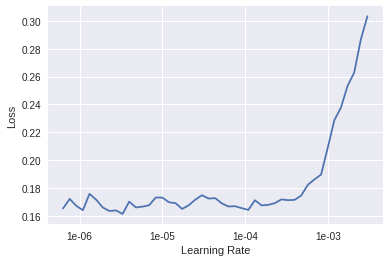

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.160608,0.198543,0.072917,01:23
1,0.147220,0.192934,0.067130,01:23
2,0.125765,0.179431,0.062500,01:23
3,0.098475,0.189688,0.060185,01:22
4,0.072834,0.173317,0.052083,01:23
5,0.057748,0.156811,0.053241,01:23
6,0.046082,0.150812,0.045139,01:22
7,0.038020,0.152781,0.049769,01:23
8,0.028526,0.150899,0.048611,01:23
9,0.026917,0.154562,0.047454,01:23


In [0]:
learn.save('stage-2')

In [38]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (3459 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dandelion,dandelion,dandelion,dandelion,dandelion
Path: data/flowers;

Valid: LabelList (864 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
daisy,dandelion,daisy,tulip,sunflower
Path: data/flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

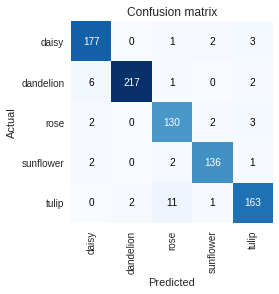

In [41]:
interp.plot_confusion_matrix() #New

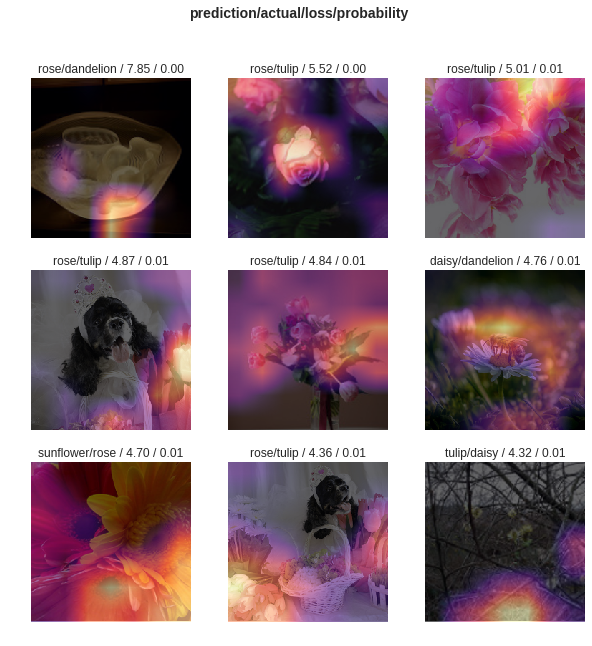

In [45]:
interp.plot_top_losses(9, figsize=(10,10
                                  ))

In [46]:
interp.most_confused()

[('tulip', 'rose', 11),
 ('dandelion', 'daisy', 6),
 ('daisy', 'tulip', 3),
 ('rose', 'tulip', 3),
 ('daisy', 'sunflower', 2),
 ('dandelion', 'tulip', 2),
 ('rose', 'daisy', 2),
 ('rose', 'sunflower', 2),
 ('sunflower', 'daisy', 2),
 ('sunflower', 'rose', 2),
 ('tulip', 'dandelion', 2),
 ('daisy', 'rose', 1),
 ('dandelion', 'rose', 1),
 ('sunflower', 'tulip', 1),
 ('tulip', 'sunflower', 1)]

In [0]:
img = open_image(path/'rose'/'rose.jpg')
img

FileNotFoundError: ignored

In [0]:
data2 = ImageDataBunch.single_from_classes(path, classes, size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

##Strings

In [0]:
txt = 'This is a thousand character long text from Shakepere literarure'

In [0]:
len(txt)

In [0]:
txt_list = txt.lower().split()

In [0]:
txt_list

In [0]:
s = {}

In [0]:
for a,b in enumerate(txt_list):
  s[b] = a
  

In [0]:
from collections import defaultdict

In [0]:
d = defaultdict(100)

In [0]:
for w in txt.lower().split():
  d[w] += 1

In [0]:
txt_list